In [23]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from time import strptime
import datetime
from datetime import datetime
import warnings
import time
import csv
import glob
import logging
import importlib
import json
from tqdm.notebook import tqdm
import sys
sys.path.append('C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/notebook/tweet_utils')
import tweets_utils
# import networkx as nx
import seaborn as sns
# import re
# from operator import itemgetter
# import matplotlib.cm as mcm
# import community
# from community import community_louvain as cm
# import leidenalg as la
# import igraph as ig
# from cdlib import algorithms
warnings.filterwarnings('ignore')
%autosave 3600

Autosaving every 3600 seconds


# Indice

- [Network Script](#script)


- [Network](#network)

    - [Netwrok info](#info)
    - [Load files](#load)
    
    
- [Communities](#communities)

    - [Stats](#stats)    
    - [Rt Disinform Dozen](#rt_dozen)
    - [Disinform Dozen and community](#dozen_comm)
    - [Good Dozen and community](#good_comm)
    - [Top communities](#top_comm)
    - [Community degrees](#degrees_comm)

# Network Script
<a id="script"/>

In [3]:
retweets_graph = nx.from_pandas_edgelist(df,'name','rt_name', create_using=nx.DiGraph())
print(nx.info(retweets_graph)) #da ritornare le info
#-----------------------------------------------------------------
degree_dict = dict(retweets_graph.degree(retweets_graph.nodes()))
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True) #da ritornare il dictionary
#-----------------------------------------------------------------
in_degree_dict = dict(retweets_graph.in_degree(retweets_graph.nodes()))
sorted_in_degree = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True) #da ritornare il dictionary
#-----------------------------------------------------------------
out_degree_dict = dict(retweets_graph.out_degree(retweets_graph.nodes()))
sorted_out_degree = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True) #da ritornare il dictionary
#-----------------------------------------------------------------
#### Communities with Louvain modularity
retweets_graph_und = nx.from_pandas_edgelist(df,'name','rt_name')
print(nx.info(retweets_graph_und)) #da ritornare 
#-----------------------------------------------------------------
best_part = cm.best_partition(retweets_graph_und, random_state=42) #da ritornare il best part
#-----------------------------------------------------------------
#### Communities with Leiden (opzionale, se riesci)
tuples = [tuple(x) for x in df_rt.values]
retweets_graph = ig.Graph.TupleList(tuples, directed = True)
n_vertices = retweets_graph.vcount()
print("Number of vertices:", n_vertices)
print("Number of edges:", retweets_graph.ecount())
print("Density of the graph:", 2*retweets_graph.ecount()/(retweets_graph.vcount()*(retweets_graph.vcount()-1)))
#da ritornare
#-----------------------------------------------------------------
total_degree=0
total_indegree = 0
total_outdegree = 0
for n in range(n_vertices):
    total_degree += retweets_graph.degree(n)
    total_indegree += retweets_graph.indegree(n)
    total_outdegree += retweets_graph.outdegree(n)
print("Average indegree:", total_indegree/n_vertices)
print("Average outdegree:", total_outdegree/n_vertices)
#da ritornare
#-----------------------------------------------------------------
partition = la.find_partition(retweets_graph, la.ModularityVertexPartition)
partition
#da ritornare

# Network
<a id="network"/>

### Nx info
<p>
    
    Type: DiGraph
    Number of nodes: 12513502
    Number of edges: 40027282
    Average in degree: 3.1987
    Average out degree: 3.1987
    
</p>
<a id="info"/>


### Load files
<a id="load"/>

In [4]:
path_degrees = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/rt_network/*degree*.json")
path_communities = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/rt_network/*communities*.json")

In [5]:
start_time = time.perf_counter()
file = open (path_degrees[0],)
degree = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  24.79629410000001


In [4]:
start_time = time.perf_counter()
file = open (path_degrees[1],)
in_degree = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  52.02346729999999


In [6]:
start_time = time.perf_counter()
file = open (path_degrees[2],)
out_degree = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  330.66192780000006


In [9]:
start_time = time.perf_counter()
file = open (path_communities[0],)
leiden = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  1.6485553999999638


In [6]:
start_time = time.perf_counter()
file = open (path_communities[1],)
louvain = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  30.771751100000017


#### write users contained into rt_network

In [7]:
path_nt = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/network/names/")
user_rtuser = pd.read_csv(path_nt[0] + "user_rtuser.csv", low_memory=False, lineterminator="\n")

In [7]:
# communities = [1,2,19]
communities = [5, 14, 15]
for j in communities:
    lst = []
    df_name = pd.DataFrame()
    for i in louvain:
        if(louvain.get(i) == j):
            lst.append(i)
    df_name = pd.DataFrame(lst, columns=['user_screen_name'])
    df_name.to_csv(path_nt[0] + f"names_{j}.csv", index=False, encoding='utf-8', line_terminator='\n')
    print(f"{j} done...")

5 done...
14 done...
15 done...


In [11]:
communities = [5, 14, 15]
for j in communities:
    df_names = pd.read_csv(path_nt[0] + f"names_{j}.csv", low_memory=False, lineterminator="\n")
    names = list(df_names["user_screen_name"])
    new_df = user_rtuser[user_rtuser.name.isin(names)]
    new_df2 = new_df[new_df.rt_name.isin(names)]
    lst_iter_t = tuple(new_df2["name"])
    lst_iter_rt = tuple(new_df2["rt_name"])
    df = pd.DataFrame(list(zip(lst_iter_t, lst_iter_rt)), columns =['name', 'rt_name'])
    df.to_csv(path_nt[0] + f"rt_nt_{j}.csv", line_terminator='\n', encoding='utf-8', index=False)
    print(f"community {j} done ...")

community 5 done ...
community 14 done ...
community 15 done ...


# Communities
<a id="communities"/>

In [8]:
path_ccdh_rt = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/ccdh/")
path_disinform = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/")

In [9]:
ccdh_rt = pd.read_csv(path_ccdh_rt[0] + "rt_bad.csv")
good_rt = pd.read_csv(path_ccdh_rt[0] + "rt_good.csv")

In [10]:
ccdh_rt_flt = ccdh_rt[ccdh_rt.user_screen_name.isin([x for x in louvain])]
good_rt_flt = good_rt[good_rt.screen_name.isin([x for x in louvain])]

In [11]:
disinform = pd.read_csv(path_disinform[0] + "disinformation_users.csv")
good_dozen = pd.read_csv(path_disinform[0] + "all_good_users.csv")

### Stats
<a id="stats"/>

In [12]:
ccdh_flt = disinform[disinform.screen_name.isin([x for x in louvain])]
good_flt = good_dozen[good_dozen.screen_name.isin([x for x in louvain])]
# ccdh_flt
# good_flt

# Dove si collocano i Good Users?

In [16]:
cont = 0
co = []
for i in tqdm(louvain):
    if i in list(good_dozen["screen_name"]):
        cont = cont + 1
        co.append(louvain.get(i))

  0%|          | 0/12513502 [00:00<?, ?it/s]

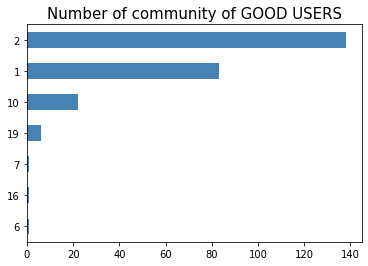

In [22]:
x=pd.Series(co).value_counts().sort_values(ascending=False)
ax = x[:10].plot(kind='barh', color='steelblue') #orange #lightseagreen
ax.set_title('Number of community of GOOD USERS', fontsize=15)
ax.invert_yaxis()

### Rt Disinform Dozen
<a id="rt_dozen"/>

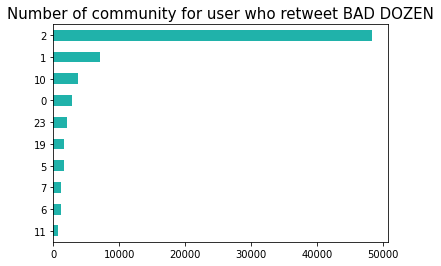

In [24]:
community = []
name = []
rt = []
for i in ccdh_rt_flt["user_screen_name"]:
    if i in louvain:
        rt.append((i, louvain.get(i)))
for i in range(len(rt)):
    community.append(rt[i][1])
val = pd.Series(community)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='lightseagreen') #orange #lightseagreen
ax.set_title('Number of community for user who retweet BAD DOZEN', fontsize=15)
ax.invert_yaxis()
plt.show()

In [25]:
x = val[:3]
s1 = val[:10]

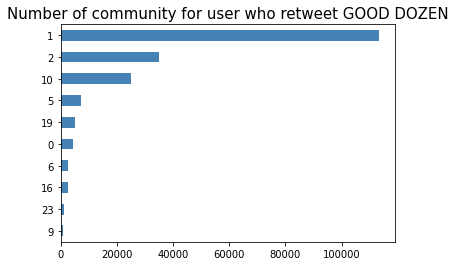

In [26]:
community = []
name = []
rt = []
for i in good_rt_flt["screen_name"]:
    if i in louvain:
        rt.append((i, louvain.get(i)))
for i in range(len(rt)):
    community.append(rt[i][1])
val = pd.Series(community)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='steelblue') #orange #lightseagreen
ax.set_title('Number of community for user who retweet GOOD DOZEN', fontsize=15)
ax.invert_yaxis()
plt.show()

In [28]:
s2 = val[:10]
tweets_utils.plot_two_hist(s2, s1, "Follower of Dozen")

In [36]:
y = val[:3]
y_v = list(y.values)
y_k = list(y.keys())
x_v = list(x.values)
x_k = list(x.keys())
label_g = ["Good", "Good", "Good"]
label_b = ["Bad", "Bad", "Bad"]
df_plot = pd.DataFrame({'Value':y_v, "Community":y_k, "Dozen":label_g})
df_plot = df_plot.append(pd.DataFrame({'Value':x_v, "Community":x_k, "Dozen": label_b}))

In [37]:
df_plot

,Value,Community,Dozen
0,24427,1,Good
1,8240,2,Good
2,2088,10,Good
0,48402,2,Bad
1,7156,1,Bad
2,3735,10,Bad


In [41]:
fig = px.bar(df_plot, x="Community", y="Value", color="Dozen", barmode='group', title="Comparison of communities of interactions with Good and Bad Dozen (Top 3)")
fig.update_xaxes(type='category')
fig.show()

### Disinform Dozen and community
<a id="dozen_comm"/>

In [20]:
for i in louvain:
    if i in list(disinform["screen_name"]):
        print(f"Name: {i}, Community: {louvain.get(i)}")

Name: unhealthytruth, Community: 2
Name: BusyDrT, Community: 2
Name: RobertKennedyJr, Community: 2
Name: mercola, Community: 2
Name: kevdjenkins1, Community: 2
Name: DrChrisNorthrup, Community: 2
Name: DrButtar, Community: 2


### Good Dozen and community
<a id="good_comm"/>


In [35]:
for i in louvain:
    if i in list(good_dozen["screen_name"]):
        print(f"Name: {i}, Community: {louvain.get(i)}")

### Top communities
<a id="top_comm"/>

In [11]:
val[:10]

5     1687953
0     1516564
1     1142470
2     1036651
11     725867
10     703335
6      685690
14     612418
19     607295
9      585305
dtype: int64

In [4]:
communities = []
for i in louvain:
    communities.append(louvain.get(i))
val = pd.Series(communities).value_counts().sort_values(ascending=False)

In [9]:
total = 0
total2 = 0
for i in val[:10]:
    total = total + i
print(f"Le prime 10 community contengono il {round(total/len(louvain)*100,2)}% degli utenti su {len(pd.Series(communities).unique())} communities")

Le prime 10 community contengono il 74.35% degli utenti su 325073 communities


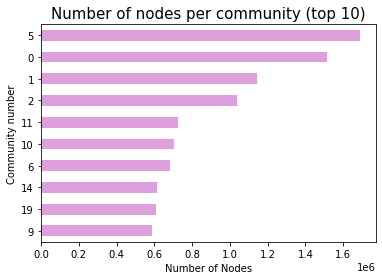

In [7]:
fig = plt.figure() #figsize=(14, 8)
ax = val[:10].plot(kind='barh', color='plum', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of nodes per community (top 10)', fontsize=15)
ax.invert_yaxis()
ax.set_ylabel("Community number")
ax.set_xlabel("Number of Nodes")

plt.show()

<p>
    
    5) Utenti comuni, non ci sono testate / influencer / politici / giornalisti
    0) Tutto ciò che riguarda le notizie in spagnolo (Sudamerica e Spagna)
    1) Politici americani / Giornalisti con posizione tendenzialmente di sinistra / Testate giornalistiche
    2) News meno politiche, più concentrato sulle notizie (maggiori testate al mondo come CNN international)
    11) Gappione (yoshiko_sead, georgebest1969, CalbeeKappaCP)
    10) Uk (SkyNewsBreak, NicolaSturgeon -> primo ministro scozzese, carolecadwalla -> giornalista)
    6) India (narendramodi -> primo ministro indiano, ANI, NorbertElekes)
    14) Korea / Thailandia
    19) Good info (United Nations, WHO, medici)
    
</p>

### Community degrees
<a id="degrees_comm"/>

In [28]:
print("In degree: ")
for i in in_degree[:10000]:
    if i[0] in list(good_dozen["screen_name"]):
        print(f"good: {i}")
    if i[0] in list(disinform["screen_name"]):
        print(f"disinform: {i}")
print("----------------------")
print("Out degree: ")
for i in out_degree[:10000]:
    if i[0] in list(good_dozen["screen_name"]):
        print(f"good: {i}")
    if i[0] in list(disinform["screen_name"]):
        print(f"disinform: {i}")

In degree: 
good: ['DrDenaGrayson', 32737]
good: ['DrTedros', 26854]
good: ['DrEricDing', 23985]
good: ['trvrb', 5936]
good: ['MackayIM', 4291]
good: ['kakape', 3419]
good: ['edyong209', 2810]
good: ['CDCDirector', 2705]
good: ['mlipsitch', 1885]
disinform: ['BusyDrT', 1274]
good: ['HelenBranswell', 1018]
good: ['ashishkjha', 637]
disinform: ['RobertKennedyJr', 579]
----------------------
Out degree: 
good: ['IlonaKickbusch', 233]
good: ['MackayIM', 171]


### Write communities

In [36]:
filename = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/network/")
list_comm = [5,1,2,19]
for i in range(len(list_comm)):
    comm = []
    for j in louvain:
        if(louvain.get(j) == i):
            comm.append(j)
    df = pd.DataFrame(comm, columns = ["name"])
    df.to_csv(f'{filename[0]}_{list_comm[i]}.csv', index=False)
    print(f'{filename[0]}_{list_comm[i]}')

C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/network/_5
C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/network/_0
C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/network/_1
C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/network/_2
C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/network/_19


In [27]:
comm = []
filename = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/network/")

for i in louvain:
    if(louvain.get(i) == 1):
        comm.append(i)
df = pd.DataFrame(comm, columns = ["name"])
# df.to_csv(filename[0] + 'prova_19.csv', index=False, encoding="utf-8", line_terminator="\n")

In [29]:
df

,name
0,AnneKPIX
1,Paxman42
2,OurWarOnCancer
3,nytimes
4,buysell55555
...,...
1142465,erinaroo
1142466,LaCoutour
1142467,GenomeMed
1142468,megannnbeck


In [39]:
prova_nt_1 = pd.read_csv(filename[0] + "prova_nt_1.csv")
rt_user = pd.read_csv(filename[0] + "user_rtuser.csv")

In [40]:
rt_user

,name,rt_name
0,Huerconetzin,AnneKPIX
1,JustAnotherAme4,cnni
2,HHSRegion8,CDCgov
3,Paxman42,OurWarOnCancer
4,beerhowell,nytimes
...,...,...
48312499,Dinora21971394,saludhn
48312500,EllyJonkerVliet,StopEcocideNL
48312501,anna76746180,Haggis_UK
48312502,SueHealy16,Auchindrain


In [38]:
for x in prova_nt_1["rt_name"]:
    if x == "mercola":
        print("f")
        break

f


In [34]:
prova_nt_1

,name,rt_name
0,Huerconetzin,AnneKPIX
1,Paxman42,OurWarOnCancer
2,beerhowell,nytimes
3,buysell55555,MerlinofCanada
4,kbplitt,cnnbrk
...,...,...
10291344,athenamarks27,StavrosZenios
10291345,someleftyfucker,HayesBrown
10291346,wordbrd,TaraLOGrady
10291347,ashsantacruz,anders_aslund
